In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

In [2]:
#0
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
#1
X = data.values[:, :2].T
y = data.values[:, 2:].T
theta = np.zeros((X.shape[0]+1, 1))
X = np.concatenate([np.ones([1, X.shape[1]]), X])
X_copy = X

In [4]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

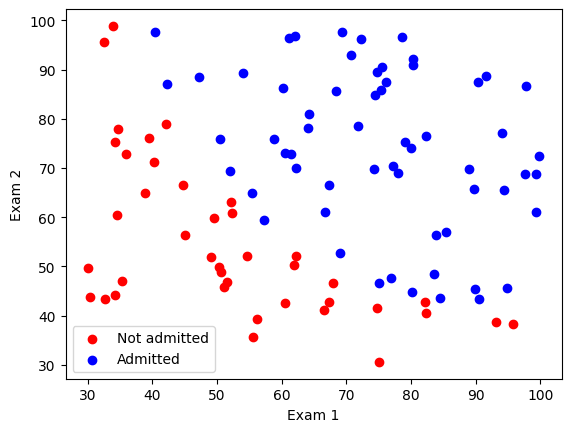

In [5]:
#2
plt.scatter(data[data['Admitted']==0]['Exam 1'],data[data['Admitted']==0]['Exam 2'], color='r', label = 'Not admitted')
plt.scatter(data[data['Admitted']==1]['Exam 1'],data[data['Admitted']==1]['Exam 2'], color='b', label = 'Admitted')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.legend()

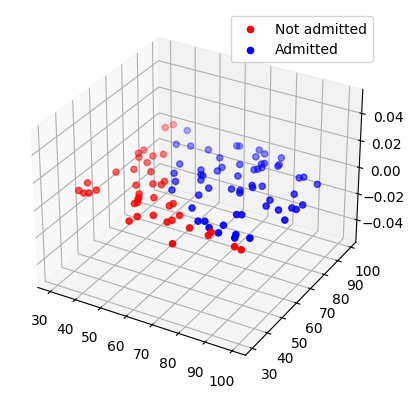

In [8]:
ax = plt.axes(projection = '3d')
ax.scatter(data[data['Admitted']==0]['Exam 1'],data[data['Admitted']==0]['Exam 2'], color='r', label = 'Not admitted')
ax.scatter(data[data['Admitted']==1]['Exam 1'],data[data['Admitted']==1]['Exam 2'], color='b', label = 'Admitted')
ax.legend()

In [11]:
#3
def sig(t):
    return 1/(1+np.exp(-t))

Text(0, 0.5, 'sig(vec)')

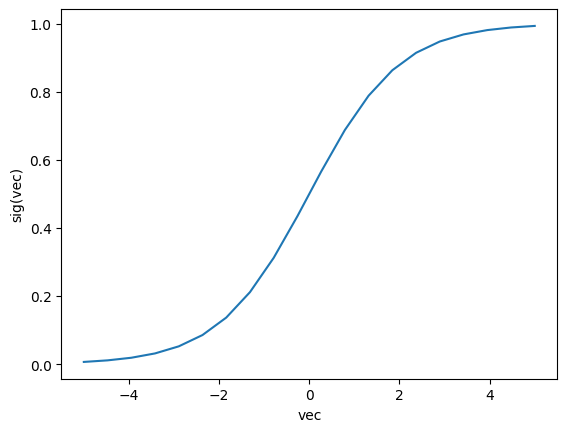

In [13]:
vec = np.linspace(-5,5,20)
plt.plot(vec, sig(vec))
plt.xlabel('vec')
plt.ylabel('sig(vec)')

In [14]:
#4
def Cost(theta, X, y):
    m = len(X[0])
    return 1/m * np.sum(-y * np.log(sig(theta.T @ X)) - (1 - y) * np.log(1 - sig(theta.T @ X)))


In [17]:
theta = np.zeros((X.shape[0], 1))
print(Cost(theta, X, y))

0.6931471805599453


In [18]:
def simple_gradient(X, y, theta, alpha, it):
    # it - number of iterations
    for i in range(it):
        der = 1/len(X[0]) * np.sum(theta.T @ X - y) @ X
        theta = theta - alpha * der
    return theta

In [20]:
alpha = 1
it = 150

In [21]:
theta = simple_gradient(X, y, theta, alpha, it)

ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)